In [1]:
from Data import data_processing as dp
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from LogisticRegression.logisticRegression_analysis import analyze_logistic_regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

In [2]:
X_train, X_test, y_train, y_test, vectorizer = dp.get_training_data()

In [3]:
# Find optimal hyperparameters using grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization type
}
# Create a Grid Search with cross-validation
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5, scoring='accuracy')

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train a Logistic Regression model with the best hyperparameters
best_logistic_regression = LogisticRegression(solver='liblinear', **best_params)
best_logistic_regression.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_logistic_regression.predict(X_test)

In [4]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
classification_report = classification_report(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Classification Report:\n{classification_report}")

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Accuracy: 0.9346153846153846
Precision: 0.9364755708879766
Recall: 0.9346153846153846
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2077
           1       0.91      0.97      0.94      2083

    accuracy                           0.93      4160
   macro avg       0.94      0.93      0.93      4160
weighted avg       0.94      0.93      0.93      4160


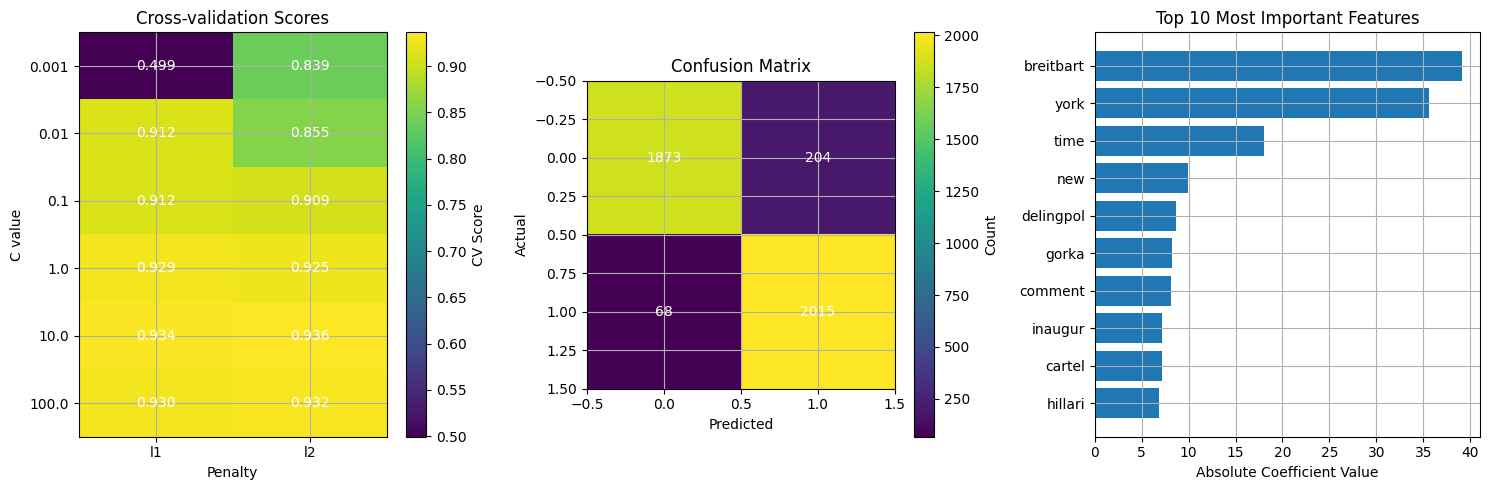


=== Model Performance Summary ===
Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Best Cross-validation Score: 0.936

Test Set Performance:
Accuracy: 0.935
True Negatives: 1873
False Positives: 204
False Negatives: 68
True Positives: 2015


In [5]:
analyze_logistic_regression(
  grid_search, X_train, y_train, y_test, y_pred, best_logistic_regression, vectorizer
)